In [1]:
from utils.data_loader import *
from utils.null_handler import *
from utils.model_tuning_utils import *
from sys import getsizeof
import numpy as np
import pandas as pd
import scipy as sp
import pickle

SEED=10

In [2]:
file = open("TX_2016_baseline.pkl",'rb')
baseline_results = pickle.load(file)
file.close()

In [3]:
file = open("TX_2016_optional_impute_mode.pkl",'rb')
imputed_results = pickle.load(file)
file.close()

In [4]:
file = open("TX_2016_optional_impute_mode_trimmed.pkl",'rb')
imputed_trimmed_results = pickle.load(file)
file.close()

In [5]:
file = open("TX_2016_optional_drop.pkl",'rb')
dropped_results = pickle.load(file)
file.close()

In [6]:
file = open("TX_2016_optional_drop_column.pkl",'rb')
dropped_col_results = pickle.load(file)
file.close()

In [7]:
pd.DataFrame(baseline_results, index=['Baseline'])

,Accuracy,Label_stability,SD,IQR,SPD_Race,SPD_Sex,SPD_Race_Sex,EO_Race,EO_Sex,EO_Race_Sex
Baseline,0.830867,0.925705,0.056636,0.066931,-0.028695,-0.105431,-0.093425,0.001601,0.057409,0.023883


In [8]:
pd.DataFrame(imputed_results, index=['Imputed_mode'])

,Accuracy,Label_stability,SD,IQR,SPD_Race,SPD_Sex,SPD_Race_Sex,EO_Race,EO_Sex,EO_Race_Sex
Imputed_mode,0.55276,0.915536,0.045949,0.019861,-0.005821,-0.00124,-0.006973,-0.003626,0.000087,-0.004043


In [9]:
pd.DataFrame(imputed_trimmed_results, index=['Imputed_mode_trimmed'])

,Accuracy,Label_stability,SD,IQR,SPD_Race,SPD_Sex,SPD_Race_Sex,EO_Race,EO_Sex,EO_Race_Sex
Imputed_mode_trimmed,0.553657,0.92038,0.04647,0.020079,-0.006755,0.000694,-0.005901,-0.00285,-0.000597,-0.002415


In [10]:
pd.DataFrame(dropped_results, index=['dropped_rows'])

,Accuracy,Label_stability,SD,IQR,SPD_Race,SPD_Sex,SPD_Race_Sex,EO_Race,EO_Sex,EO_Race_Sex
dropped_rows,0.827533,0.925,0.056083,0.066413,-0.001692,-0.151663,-0.090706,-0.006911,0.048567,0.023041


In [11]:
pd.DataFrame(dropped_col_results, index=['dropped_col'])

,Accuracy,Label_stability,SD,IQR,SPD_Race,SPD_Sex,SPD_Race_Sex,EO_Race,EO_Sex,EO_Race_Sex
dropped_col,0.553161,0.913836,0.045497,0.019854,-0.00505,0.001085,-0.002159,-0.003799,-0.000925,-0.002839


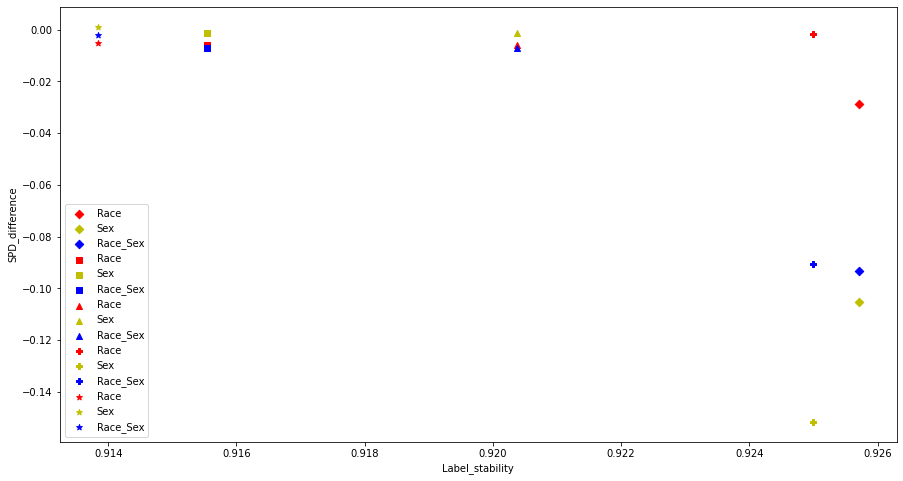

In [12]:
x_metric = 'Label_stability'
y_metric = ['SPD_Race', 'SPD_Sex', 'SPD_Race_Sex']

plt.figure(figsize=(15,8))
plt.scatter(baseline_results[x_metric], baseline_results[y_metric[0]], label="Race", marker="D", c='r')
plt.scatter(baseline_results[x_metric], baseline_results[y_metric[1]], label="Sex", marker="D", c='y')
plt.scatter(baseline_results[x_metric], baseline_results[y_metric[2]], label="Race_Sex", marker="D", c='b')

plt.scatter(imputed_results[x_metric], imputed_results[y_metric[0]], label="Race", marker="s", c='r')
plt.scatter(imputed_results[x_metric], imputed_results[y_metric[1]], label="Sex", marker="s", c='y')
plt.scatter(imputed_results[x_metric], imputed_results[y_metric[2]], label="Race_Sex", marker="s", c='b')

plt.scatter(imputed_trimmed_results[x_metric], imputed_results[y_metric[0]], label="Race", marker="^", c='r')
plt.scatter(imputed_trimmed_results[x_metric], imputed_results[y_metric[1]], label="Sex", marker="^", c='y')
plt.scatter(imputed_trimmed_results[x_metric], imputed_results[y_metric[2]], label="Race_Sex", marker="^", c='b')

plt.scatter(dropped_results[x_metric], dropped_results[y_metric[0]], label="Race", marker="P", c='r')
plt.scatter(dropped_results[x_metric], dropped_results[y_metric[1]], label="Sex", marker="P", c='y')
plt.scatter(dropped_results[x_metric], dropped_results[y_metric[2]], label="Race_Sex", marker="P", c='b')

plt.scatter(dropped_col_results[x_metric], dropped_col_results[y_metric[0]], label="Race", marker="*", c='r')
plt.scatter(dropped_col_results[x_metric], dropped_col_results[y_metric[1]], label="Sex", marker="*", c='y')
plt.scatter(dropped_col_results[x_metric], dropped_col_results[y_metric[2]], label="Race_Sex", marker="*", c='b')

plt.xlabel(x_metric)
plt.ylabel("SPD_difference")
plt.legend()
plt.show()

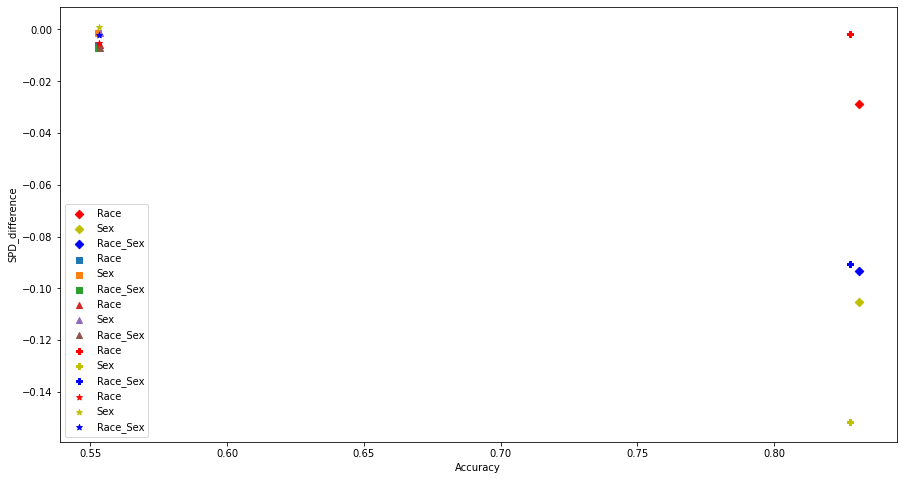

In [13]:
x_metric = 'Accuracy'
y_metric = ['SPD_Race', 'SPD_Sex', 'SPD_Race_Sex']

plt.figure(figsize=(15,8))
plt.scatter(baseline_results[x_metric], baseline_results[y_metric[0]], label="Race", marker="D", c='r')
plt.scatter(baseline_results[x_metric], baseline_results[y_metric[1]], label="Sex", marker="D", c='y')
plt.scatter(baseline_results[x_metric], baseline_results[y_metric[2]], label="Race_Sex", marker="D", c='b')

plt.scatter(imputed_results[x_metric], imputed_results[y_metric[0]], label="Race", marker="s")
plt.scatter(imputed_results[x_metric], imputed_results[y_metric[1]], label="Sex", marker="s")
plt.scatter(imputed_results[x_metric], imputed_results[y_metric[2]], label="Race_Sex", marker="s")

plt.scatter(imputed_trimmed_results[x_metric], imputed_results[y_metric[0]], label="Race", marker="^")
plt.scatter(imputed_trimmed_results[x_metric], imputed_results[y_metric[1]], label="Sex", marker="^")
plt.scatter(imputed_trimmed_results[x_metric], imputed_results[y_metric[2]], label="Race_Sex", marker="^")

plt.scatter(dropped_results[x_metric], dropped_results[y_metric[0]], label="Race", marker="P", c='r')
plt.scatter(dropped_results[x_metric], dropped_results[y_metric[1]], label="Sex", marker="P", c='y')
plt.scatter(dropped_results[x_metric], dropped_results[y_metric[2]], label="Race_Sex", marker="P", c='b')

plt.scatter(dropped_col_results[x_metric], dropped_col_results[y_metric[0]], label="Race", marker="*", c='r')
plt.scatter(dropped_col_results[x_metric], dropped_col_results[y_metric[1]], label="Sex", marker="*", c='y')
plt.scatter(dropped_col_results[x_metric], dropped_col_results[y_metric[2]], label="Race_Sex", marker="*", c='b')

plt.xlabel(x_metric)
plt.ylabel("SPD_difference")
plt.legend()
plt.show()

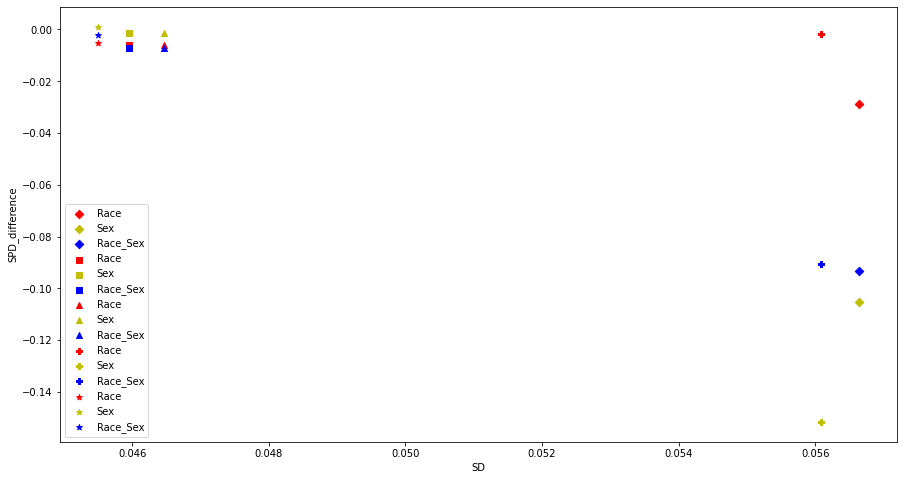

In [14]:
x_metric = 'SD'
y_metric = ['SPD_Race', 'SPD_Sex', 'SPD_Race_Sex']

plt.figure(figsize=(15,8))
plt.scatter(baseline_results[x_metric], baseline_results[y_metric[0]], label="Race", marker="D", c='r')
plt.scatter(baseline_results[x_metric], baseline_results[y_metric[1]], label="Sex", marker="D", c='y')
plt.scatter(baseline_results[x_metric], baseline_results[y_metric[2]], label="Race_Sex", marker="D", c='b')

plt.scatter(imputed_results[x_metric], imputed_results[y_metric[0]], label="Race", marker="s", c='r')
plt.scatter(imputed_results[x_metric], imputed_results[y_metric[1]], label="Sex", marker="s", c='y')
plt.scatter(imputed_results[x_metric], imputed_results[y_metric[2]], label="Race_Sex", marker="s", c='b')

plt.scatter(imputed_trimmed_results[x_metric], imputed_results[y_metric[0]], label="Race", marker="^", c='r')
plt.scatter(imputed_trimmed_results[x_metric], imputed_results[y_metric[1]], label="Sex", marker="^", c='y')
plt.scatter(imputed_trimmed_results[x_metric], imputed_results[y_metric[2]], label="Race_Sex", marker="^", c='b')

plt.scatter(dropped_results[x_metric], dropped_results[y_metric[0]], label="Race", marker="P", c='r')
plt.scatter(dropped_results[x_metric], dropped_results[y_metric[1]], label="Sex", marker="P", c='y')
plt.scatter(dropped_results[x_metric], dropped_results[y_metric[2]], label="Race_Sex", marker="P", c='b')

plt.scatter(dropped_col_results[x_metric], dropped_col_results[y_metric[0]], label="Race", marker="*", c='r')
plt.scatter(dropped_col_results[x_metric], dropped_col_results[y_metric[1]], label="Sex", marker="*", c='y')
plt.scatter(dropped_col_results[x_metric], dropped_col_results[y_metric[2]], label="Race_Sex", marker="*", c='b')

plt.xlabel(x_metric)
plt.ylabel("SPD_difference")
plt.legend()
plt.show()

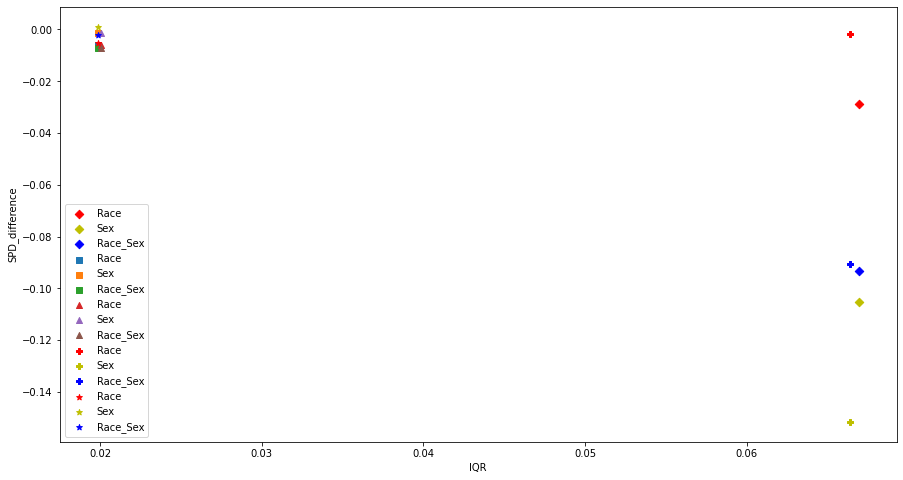

In [15]:
x_metric = 'IQR'
y_metric = ['SPD_Race', 'SPD_Sex', 'SPD_Race_Sex']

plt.figure(figsize=(15,8))
plt.scatter(baseline_results[x_metric], baseline_results[y_metric[0]], label="Race", marker="D", c='r')
plt.scatter(baseline_results[x_metric], baseline_results[y_metric[1]], label="Sex", marker="D", c='y')
plt.scatter(baseline_results[x_metric], baseline_results[y_metric[2]], label="Race_Sex", marker="D", c='b')

plt.scatter(imputed_results[x_metric], imputed_results[y_metric[0]], label="Race", marker="s")
plt.scatter(imputed_results[x_metric], imputed_results[y_metric[1]], label="Sex", marker="s")
plt.scatter(imputed_results[x_metric], imputed_results[y_metric[2]], label="Race_Sex", marker="s")

plt.scatter(imputed_trimmed_results[x_metric], imputed_results[y_metric[0]], label="Race", marker="^")
plt.scatter(imputed_trimmed_results[x_metric], imputed_results[y_metric[1]], label="Sex", marker="^")
plt.scatter(imputed_trimmed_results[x_metric], imputed_results[y_metric[2]], label="Race_Sex", marker="^")

plt.scatter(dropped_results[x_metric], dropped_results[y_metric[0]], label="Race", marker="P", c='r')
plt.scatter(dropped_results[x_metric], dropped_results[y_metric[1]], label="Sex", marker="P", c='y')
plt.scatter(dropped_results[x_metric], dropped_results[y_metric[2]], label="Race_Sex", marker="P", c='b')

plt.scatter(dropped_col_results[x_metric], dropped_col_results[y_metric[0]], label="Race", marker="*", c='r')
plt.scatter(dropped_col_results[x_metric], dropped_col_results[y_metric[1]], label="Sex", marker="*", c='y')
plt.scatter(dropped_col_results[x_metric], dropped_col_results[y_metric[2]], label="Race_Sex", marker="*", c='b')

plt.xlabel(x_metric)
plt.ylabel("SPD_difference")
plt.legend()
plt.show()

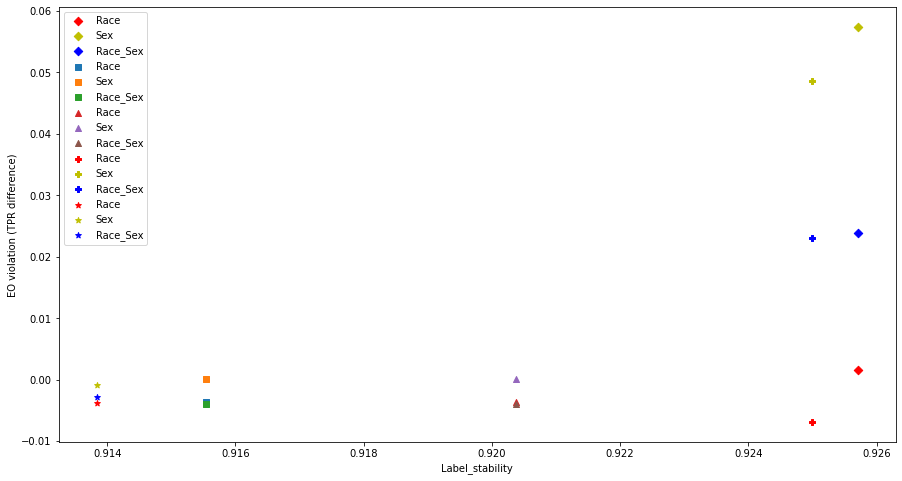

In [16]:
x_metric = 'Label_stability'
y_metric = ['EO_Race', 'EO_Sex', 'EO_Race_Sex']

plt.figure(figsize=(15,8))
plt.scatter(baseline_results[x_metric], baseline_results[y_metric[0]], label="Race", marker="D", c='r')
plt.scatter(baseline_results[x_metric], baseline_results[y_metric[1]], label="Sex", marker="D", c='y')
plt.scatter(baseline_results[x_metric], baseline_results[y_metric[2]], label="Race_Sex", marker="D", c='b')

plt.scatter(imputed_results[x_metric], imputed_results[y_metric[0]], label="Race", marker="s")
plt.scatter(imputed_results[x_metric], imputed_results[y_metric[1]], label="Sex", marker="s")
plt.scatter(imputed_results[x_metric], imputed_results[y_metric[2]], label="Race_Sex", marker="s")

plt.scatter(imputed_trimmed_results[x_metric], imputed_results[y_metric[0]], label="Race", marker="^")
plt.scatter(imputed_trimmed_results[x_metric], imputed_results[y_metric[1]], label="Sex", marker="^")
plt.scatter(imputed_trimmed_results[x_metric], imputed_results[y_metric[2]], label="Race_Sex", marker="^")

plt.scatter(dropped_results[x_metric], dropped_results[y_metric[0]], label="Race", marker="P", c='r')
plt.scatter(dropped_results[x_metric], dropped_results[y_metric[1]], label="Sex", marker="P", c='y')
plt.scatter(dropped_results[x_metric], dropped_results[y_metric[2]], label="Race_Sex", marker="P", c='b')

plt.scatter(dropped_col_results[x_metric], dropped_col_results[y_metric[0]], label="Race", marker="*", c='r')
plt.scatter(dropped_col_results[x_metric], dropped_col_results[y_metric[1]], label="Sex", marker="*", c='y')
plt.scatter(dropped_col_results[x_metric], dropped_col_results[y_metric[2]], label="Race_Sex", marker="*", c='b')

plt.xlabel(x_metric)
plt.ylabel("EO violation (TPR difference)")
plt.legend()
plt.show()

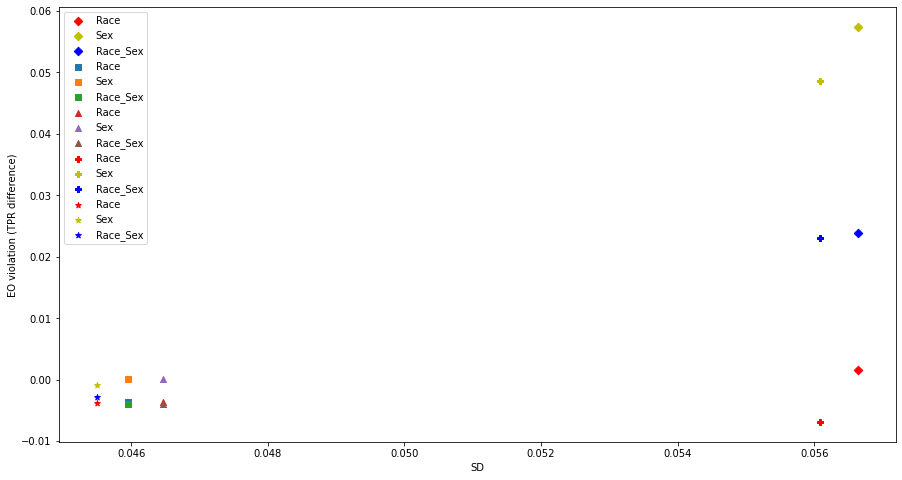

In [17]:
x_metric = 'SD'
y_metric = ['EO_Race', 'EO_Sex', 'EO_Race_Sex']

plt.figure(figsize=(15,8))
plt.scatter(baseline_results[x_metric], baseline_results[y_metric[0]], label="Race", marker="D", c='r')
plt.scatter(baseline_results[x_metric], baseline_results[y_metric[1]], label="Sex", marker="D", c='y')
plt.scatter(baseline_results[x_metric], baseline_results[y_metric[2]], label="Race_Sex", marker="D", c='b')

plt.scatter(imputed_results[x_metric], imputed_results[y_metric[0]], label="Race", marker="s")
plt.scatter(imputed_results[x_metric], imputed_results[y_metric[1]], label="Sex", marker="s")
plt.scatter(imputed_results[x_metric], imputed_results[y_metric[2]], label="Race_Sex", marker="s")

plt.scatter(imputed_trimmed_results[x_metric], imputed_results[y_metric[0]], label="Race", marker="^")
plt.scatter(imputed_trimmed_results[x_metric], imputed_results[y_metric[1]], label="Sex", marker="^")
plt.scatter(imputed_trimmed_results[x_metric], imputed_results[y_metric[2]], label="Race_Sex", marker="^")

plt.scatter(dropped_results[x_metric], dropped_results[y_metric[0]], label="Race", marker="P", c='r')
plt.scatter(dropped_results[x_metric], dropped_results[y_metric[1]], label="Sex", marker="P", c='y')
plt.scatter(dropped_results[x_metric], dropped_results[y_metric[2]], label="Race_Sex", marker="P", c='b')

plt.scatter(dropped_col_results[x_metric], dropped_col_results[y_metric[0]], label="Race", marker="*", c='r')
plt.scatter(dropped_col_results[x_metric], dropped_col_results[y_metric[1]], label="Sex", marker="*", c='y')
plt.scatter(dropped_col_results[x_metric], dropped_col_results[y_metric[2]], label="Race_Sex", marker="*", c='b')

plt.xlabel(x_metric)
plt.ylabel("EO violation (TPR difference)")
plt.legend()
plt.show()